## CNN Autoencoder

In [1]:
from keras.utils.vis_utils import plot_model
from keras_visualizer import visualizer
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from autoencoders.CAE import CAE

DATASET_SIZE = 25082
INPUT_SHAPE = (20, 20, 1)

In [2]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [3]:
datagen = ImageDataGenerator(
                        rescale=1./255,
                        validation_split=0.2,
                        horizontal_flip=True)
# Allow horizontal flip as a mirror image of a game is a valid game state

train_datagen = datagen.flow_from_directory('images_ballless/',
                                            target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                                            color_mode='grayscale',
                                            class_mode='input',
                                            shuffle=True,
                                            subset='training')

val_datagen = datagen.flow_from_directory('images_ballless/',
                                                target_size=(INPUT_SHAPE[0], INPUT_SHAPE[1]),
                                            color_mode='grayscale',
                                            class_mode='input',
                                            shuffle=True,
                                            subset='validation')

Found 20067 images belonging to 1 classes.
Found 5016 images belonging to 1 classes.


In [4]:
cae = CAE(
    layers=4,
    input_shape=INPUT_SHAPE,
    latent_size=16,
    filters=16,
    name="CAE")
cae.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 20, 20, 1)]       0         
_________________________________________________________________
conv1_enc (Conv2D)           (None, 20, 20, 16)        160       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 10, 10, 16)        0         
_________________________________________________________________
conv2_enc (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 5, 5, 32)          0         
_________________________________________________________________
conv3_enc (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 3, 3, 64)          0   

In [5]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=30)
]

history = cae.train(
    train_datagen, 
    val_datagen, 
    epochs=100, 
    callbacks=callbacks
)

Epoch 1/100
628/628 [==============================] - 32s 32ms/step - loss: 0.1028 - val_loss: 0.0038
Epoch 2/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0026 - val_loss: 0.0159
Epoch 3/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0023 - val_loss: 7.3313e-06
Epoch 4/100
628/628 [==============================] - 5s 8ms/step - loss: 1.6311e-05 - val_loss: 2.7208e-06
Epoch 5/100
628/628 [==============================] - 5s 7ms/step - loss: 0.0085 - val_loss: 3.4845e-04
Epoch 6/100
628/628 [==============================] - 5s 8ms/step - loss: 7.6530e-05 - val_loss: 2.9721e-06
Epoch 7/100
628/628 [==============================] - 5s 8ms/step - loss: 1.5687e-04 - val_loss: 0.0019
Epoch 8/100
628/628 [==============================] - 5s 8ms/step - loss: 0.0016 - val_loss: 6.6062e-06
Epoch 9/100
628/628 [==============================] - 5s 7ms/step - loss: 7.2757e-06 - val_loss: 2.0008e-06
Epoch 10/100
628/628 [===========================

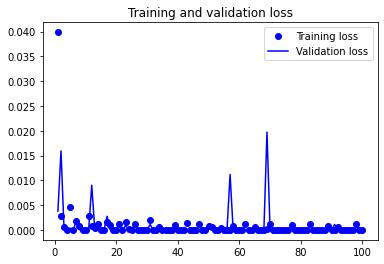

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)    

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

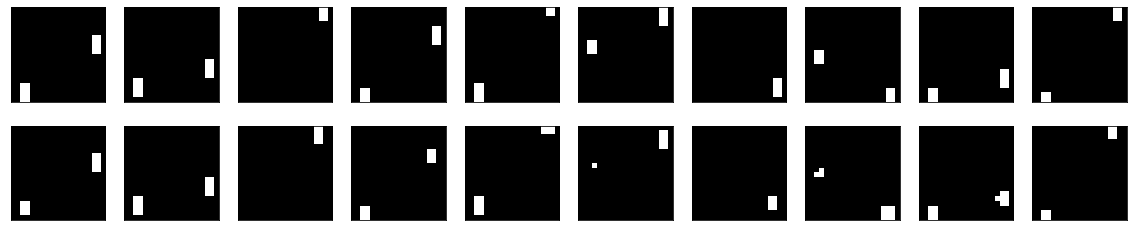

In [7]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import random

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, DATASET_SIZE)
    img = img_to_array(load_img(f"images_ballless/pong_ballless_{rand_img}.png", color_mode='grayscale'))
    images[i] = img

decoded_imgs = cae.predict(images)

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [8]:
cae.model.save("models/cae_ballless")

INFO:tensorflow:Assets written to: models/cae_ballless/assets
